# Phase 2, Initial Experiments

In this notebook, I will use the experiment and semspace classes developed out of phase 1 of this project. The principal goal of phase 2, as it concerns this notebook, is to create a semantic space for verbs based on their inner-clausal arguments. This notebook presents the first experiments using the new experiment classes.

All of the spaces in this notebook are generated using a variety of Experiment classes defined in [project_code/experiments](project_code/experiments.py). These classes allow target word and basis selection to be fine tuned and modified while preserving previous versions of the experiment parameters. A target word is a word that is included in the space. A basis is the context element that occurs with the given target word, be it a prepositional phrase with a function of 'adjunct' or a noun phrase with a function of 'object'. Bases can be lexemes contained in the context element; but they can also be combinations of lexemes combined with their phrase function, part of speech, or coordinate nouns within the phrase.

There are two versions of classes used in this notebook to produce the results:

* Experiment - Experiment and its daughter classes load and deliver results from the ETCBC BHSA database.
* SemSpace - Semspace converts experiment data into a semantic space that can be plotted and examined.

In [1]:
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.experiments import Experiment, VerbExperiment1, VerbMinLexBasis, VerbNoSubj, VerbAndStem
from project_code.semspace import SemSpace, get_lex
from project_code.kmedoids.kmedoids import kMedoids
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_initial_experiments', version='c')

This is Text-Fabric 3.4.2
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

## Verb Experiment 1, Verbs with Full Lexical Information for Arguments 

For this experiment, all basis elements are created with the lexeme of the phrase's head word(s). 

In [3]:
verb_exp1 = VerbExperiment1(tf_api=tf_api)
v1_space = SemSpace(verb_exp1, info=500000)

  0.00s Beginning all calculations...
  0.01s beginning Loglikelihood calculations...
   |     9.58s at iteration 500000
   |       20s at iteration 1000000
   |       29s at iteration 1500000
   |       36s at iteration 2000000
   |       45s at iteration 2500000
   |       54s at iteration 3000000
   |    1m 04s at iteration 3500000
   |    1m 11s at iteration 4000000
   |    1m 19s at iteration 4500000
   |    1m 25s at iteration 5000000
   |    1m 31s at iteration 5500000
 1m 34s FINISHED loglikelihood at iteration 5707445
 1m 34s beginning PMI calculations...
 2m 18s data gathering complete!
done!


A sample of the data...

In [4]:
list(verb_exp1.raw_data['>KL['])[:10]

['Pred.Cmpl.MN_<Y/',
 'Pred.Cmpl.MN_KL/',
 'Pred.Objc.>T_KSP/',
 'Pred.Loca.CM',
 'Pred.Loca.<L_GL/',
 'Pred.Objc.LXM/',
 'Pred.Subj.PRH/',
 'Pred.Objc.>T_PRH/',
 'Pred.Objc.>T_CBR=/',
 'Pred.Objc.>T_XQ/']

The sample data shows that these are all instances where the lexeme אכל functions as a predicate (they will all be so in this case). The tag is followed with cooccurrence information of the basis phrase function, e.g. "Cmpl" for complement.

## Plot Visualizations

Similar to what we experienced with phase 1 and the nouns, the plot visualizations are not immediately informative...

### PMI Plots

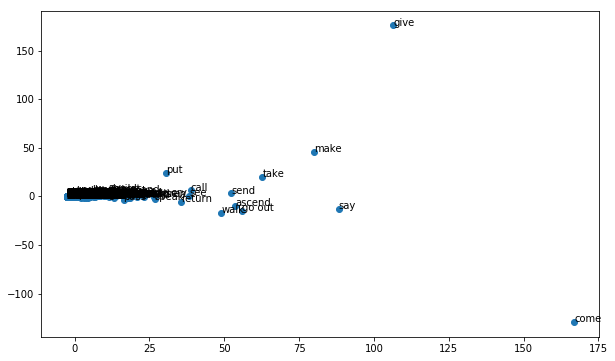

In [5]:
v1_space.pmi_plot.show()

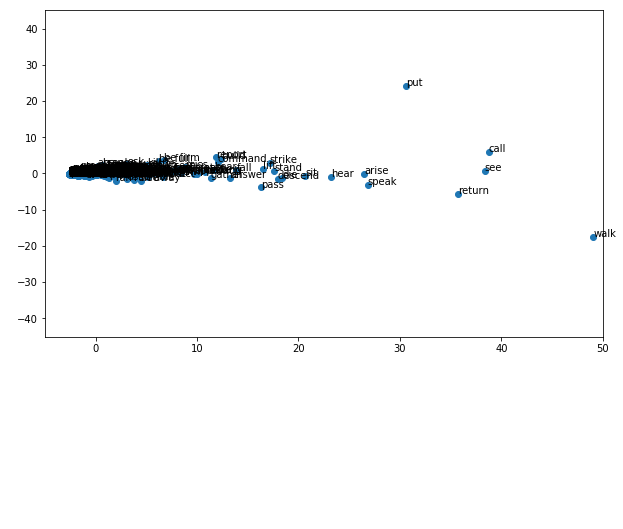

In [6]:
v1_space.pmi_plot.show(axis=[-5, 50, -45, 45]) # zoom in

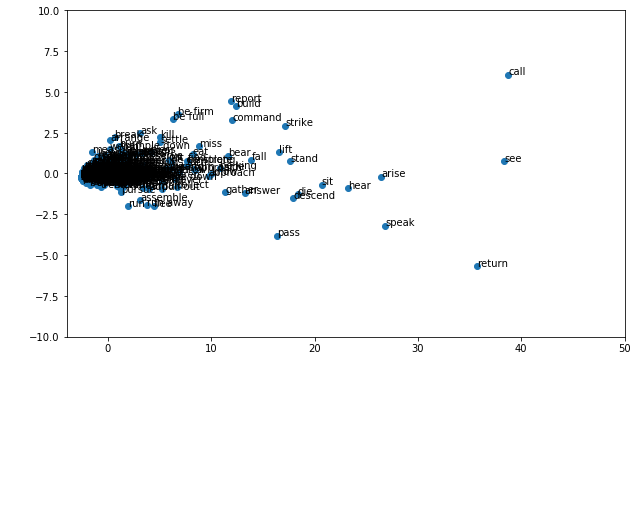

In [7]:
v1_space.pmi_plot.show(axis=[-4, 50, -10, 10]) # zoom in

### Raw Plots

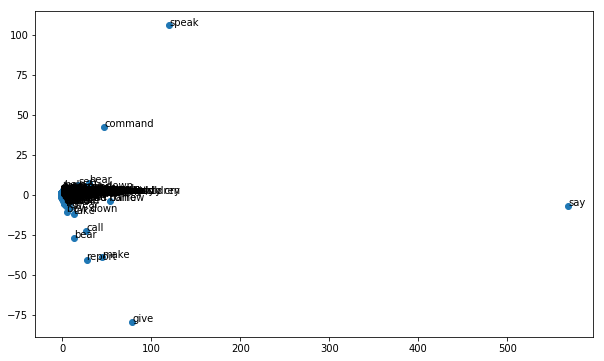

In [8]:
v1_space.raw_plot.show()

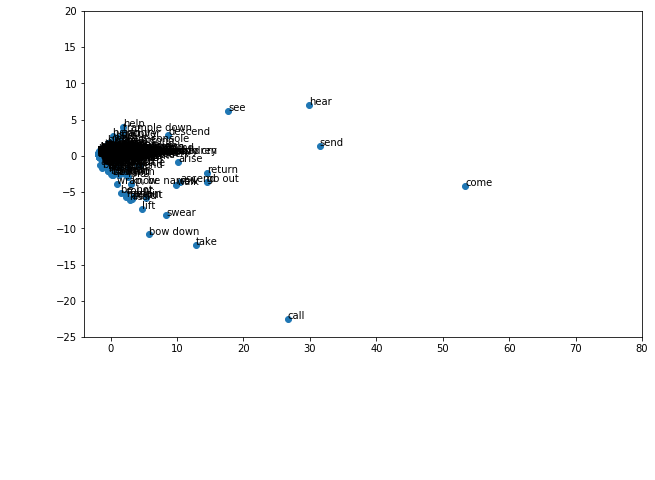

In [9]:
v1_space.raw_plot.show(axis=[-4, 80, -25, 20]) # zoom in

## Looking at Top Similarities

As seen below, the results for pmi appear better than with ll, similar to the nouns space:

**Loglikelihood**

In [24]:
def get_lex_gloss(lex_string):
    lex = get_lex(lex_string, tf_api)
    gloss = F.gloss.v(lex)
    return f'{F.lex.v(lex)} ({gloss})'

def show_sims(lex_string, sim_matrix, show=10):
    key = get_lex_gloss(lex_string)
    print(sim_matrix[key].sort_values(ascending=False).head(show))

In [11]:
show_sims('BW>[', v1_space.similarity_ll)

BW>[ (come)               1.000000
QCB[ (give attention)     0.198192
XBQ[ (embrace)            0.195285
NWD[ (waver)              0.195285
SGD[ (prostrate)          0.195285
R<H=[ (deal with)         0.195285
XNN[ (favour)             0.166464
YRR[ (wrap, be narrow)    0.164755
NGD[ (report)             0.150366
NCQ[ (kiss)               0.143716
Name: BW>[ (come), dtype: float64


**PMI**

In [12]:
show_sims('BW>[', v1_space.similarity_pmi)

BW>[ (come)      1.000000
JY>[ (go out)    0.166876
>MR[ (say)       0.164771
HLK[ (walk)      0.163326
<LH[ (ascend)    0.151313
CWB[ (return)    0.149044
CLX[ (send)      0.131270
DBR[ (speak)     0.108963
R>H[ (see)       0.101614
LQX[ (take)      0.100056
Name: BW>[ (come), dtype: float64


Likewise, the pmi appears to outperform the raw counts for this word:

**Raw**

In [13]:
show_sims('BW>[', v1_space.similarity_raw)

BW>[ (come)        1.000000
CWB[ (return)      0.507520
>MR[ (say)         0.479096
NGC[ (approach)    0.475417
JY>[ (go out)      0.440495
>ZN[ (listen)      0.434668
R>H[ (see)         0.418875
JRD[ (descend)     0.413120
QRB[ (approach)    0.405860
HLK[ (walk)        0.402125
Name: BW>[ (come), dtype: float64


What about Jaccardian distance?

**Jaccard**

In [14]:
show_sims('BW>[', v1_space.similarity_jaccard)

BW>[ (come)      1.000000
>MR[ (say)       0.133032
HLK[ (walk)      0.126183
JY>[ (go out)    0.125253
<LH[ (ascend)    0.117886
CWB[ (return)    0.108844
CLX[ (send)      0.105584
LQX[ (take)      0.084545
R>H[ (see)       0.083333
DBR[ (speak)     0.078795
Name: BW>[ (come), dtype: float64


The results are generally similar except that "say" is boosted.

### Other Terms (mostly in PMI)

In [15]:
show_sims('>KL[', v1_space.similarity_pmi)

>KL[ (eat)            1.000000
V<M[ (taste)          0.090886
CPV[ (judge)          0.089947
XLM[ (dream)          0.085450
DBR[ (speak)          0.080401
YLL==[ (grow dark)    0.079973
<LH[ (ascend)         0.073215
CBT[ (cease)          0.072424
>LM[ (bind)           0.072208
BKH[ (weep)           0.071930
Name: >KL[ (eat), dtype: float64


In [16]:
show_sims('CTH[', v1_space.similarity_pmi)

CTH[ (drink)           1.000000
<FQ[ (contend)         0.172756
CKR[ (be drunk)        0.172756
>LM[ (bind)            0.167205
XJL==[ (wait)          0.148281
XRC[ (be deaf)         0.144702
DLX[ (make turbid)     0.118703
XTT[ (be terrified)    0.108966
JQY[ (awake)           0.106514
>BQ[ (wrestle)         0.096575
Name: CTH[ (drink), dtype: float64


In [17]:
show_sims('CKB[', v1_space.similarity_pmi)

CKB[ (lie down)         1.000000
MLK[ (be king)          0.199496
GHR[ (crouch)           0.120383
QDD[ (kneel down)       0.106617
XLH[ (become weak)      0.105971
CKR[ (be drunk)         0.099854
<FQ[ (contend)          0.099854
Z<P[ (be embittered)    0.081292
JSP[ (add)              0.080870
JCB[ (sit)              0.079644
Name: CKB[ (lie down), dtype: float64


In [18]:
show_sims('CJR[', v1_space.similarity_pmi)

CJR[ (sing)           1.000000
NGF[ (drive)          0.149147
R<M[ (thunder)        0.119275
Z<Q[ (cry)            0.114114
YWM[ (fast)           0.113697
XLH[ (become weak)    0.106836
RDP[ (pursue)         0.090975
CQV[ (be at peace)    0.090669
<YR[ (restrain)       0.088272
PRR[ (break)          0.084253
Name: CJR[ (sing), dtype: float64


In [19]:
show_sims('CJR[', v1_space.similarity_ll)

CJR[ (sing)         1.000000
YWM[ (fast)         0.102572
NGF[ (drive)        0.102538
XPR=[ (dig)         0.080686
CBT[ (cease)        0.071156
R<M[ (thunder)      0.061377
Z<Q[ (cry)          0.045653
KN<[ (be humble)    0.043499
RDP[ (pursue)       0.042459
BQ<[ (split)        0.041475
Name: CJR[ (sing), dtype: float64


In [20]:
show_sims('CJR[', v1_space.similarity_raw)

CJR[ (sing)         1.000000
YWM[ (fast)         0.298142
CBT[ (cease)        0.280056
XPR=[ (dig)         0.272166
NGF[ (drive)        0.258199
R<M[ (thunder)      0.204124
BQ<[ (split)        0.187317
NBV[ (look at)      0.160128
CXT[ (destroy)      0.158610
KN<[ (be humble)    0.157135
Name: CJR[ (sing), dtype: float64


In [21]:
show_sims('Z<Q[', v1_space.similarity_pmi)

Z<Q[ (cry)             1.000000
BWK[ (confuse)         0.159797
Y<Q[ (cry)             0.148472
XNK[ (dedicate)        0.130366
QDD[ (kneel down)      0.125978
XRC[ (be deaf)         0.116292
CJR[ (sing)            0.114114
M>N[ (refuse)          0.102539
TMH[ (be astounded)    0.097450
XNN[ (favour)          0.093415
Name: Z<Q[ (cry), dtype: float64


In [22]:
show_sims('MLK[', v1_space.similarity_pmi)

MLK[ (be king)        1.000000
CKB[ (lie down)       0.199496
XLH[ (become weak)    0.128126
MWT[ (die)            0.119288
SPD[ (lament)         0.098468
MCX[ (smear)          0.096945
CLX[ (send)           0.096567
JKX[ (reprove)        0.090230
QDC[ (be holy)        0.081756
>MR[ (say)            0.081489
Name: MLK[ (be king), dtype: float64


#### Case Study: מלך and שכב

Why does "to be king" and "to lie down" appear similar?

In [20]:
def get_common(lex1, lex2, sem_matrix):
    lex1_observed = set(sem_matrix[lex1][sem_matrix[lex1] > 0].index)
    lex2_observed = set(sem_matrix[lex2][sem_matrix[lex2] > 0].index)
    return lex1_observed & lex2_observed

In [24]:
get_common('MLK[', 'CKB[')

{'Pred.Cmpl.<L',
 'Pred.Cmpl.CM',
 'Pred.Objc.>T',
 'Pred.Subj.<MRJ/',
 'Pred.Subj.>BJH/',
 'Pred.Subj.>BJM/',
 'Pred.Subj.>S>/',
 'Pred.Subj.>X>B/',
 'Pred.Subj.>XZ=/',
 'Pred.Subj.C>WL=/',
 'Pred.Subj.CLMH=/',
 'Pred.Subj.DWD==/',
 'Pred.Subj.JHW>/',
 'Pred.Subj.JHW>XZ/',
 'Pred.Subj.JHWCPV/',
 'Pred.Subj.JRB<M/',
 'Pred.Subj.JW>C/',
 'Pred.Subj.JWTM/',
 'Pred.Subj.JXZQJHW/',
 'Pred.Subj.MLK/',
 'Pred.Subj.MNCH/',
 'Pred.Subj.RXB<M/',
 'Pred.Subj.XZQJHW/'}

**Note that many of these ^ similarities are due to identical subjects. It is this observation which has inspired a new experiment (see below), `VerbNoSubj`, which excludes subjects.**

In [25]:
show_sims('R>H[', v1_space.similarity_pmi)

R>H[ (see)          1.000000
>MR[ (say)          0.129072
CM<[ (hear)         0.106730
BW>[ (come)         0.101614
NGC[ (approach)     0.099389
QWM[ (arise)        0.098906
NKR[ (recognise)    0.097494
JR>[ (fear)         0.096271
JSP[ (add)          0.094448
<NH[ (answer)       0.091852
Name: R>H[ (see), dtype: float64


**Show list of top verbs and their top most common verbs:**

In [26]:
def show_top(raw_matrix, sim_matrix, show=20): 

    top = raw_matrix.sum().sort_values(ascending=False).head(show)

    for verb in top.index:
        
        key = get_lex_gloss(verb)

        print(sim_matrix[key].sort_values(ascending=False).head(10))
        print()

In [27]:
show_top(v1_space.raw, v1_space.similarity_pmi, show=10)

>MR[ (say)         1.000000
NGD[ (report)      0.172354
BW>[ (come)        0.164771
DBR[ (speak)       0.164109
CM<[ (hear)        0.158835
QR>[ (call)        0.147620
R>H[ (see)         0.129072
QWM[ (arise)       0.126700
<NH[ (answer)      0.121826
NGC[ (approach)    0.120978
Name: >MR[ (say), dtype: float64

BW>[ (come)      1.000000
JY>[ (go out)    0.166876
>MR[ (say)       0.164771
HLK[ (walk)      0.163326
<LH[ (ascend)    0.151313
CWB[ (return)    0.149044
CLX[ (send)      0.131270
DBR[ (speak)     0.108963
R>H[ (see)       0.101614
LQX[ (take)      0.100056
Name: BW>[ (come), dtype: float64

NTN[ (give)       1.000000
FJM[ (put)        0.151375
LQX[ (take)       0.109481
CLX[ (send)       0.105985
<FH[ (make)       0.104772
NGD[ (report)     0.102624
BW>[ (come)       0.090694
>MR[ (say)        0.087090
KWN[ (be firm)    0.086734
YWH[ (command)    0.080546
Name: NTN[ (give), dtype: float64

<FH[ (make)           1.000000
NTN[ (give)           0.104772
BNH[ (build)          0.

## Verb Experiment 2, Verbs with Muted Lexical Arguments

Lexemes for complements are replaced with part of speech tags with these experiment parameters.

In [5]:
verb_exp2 = VerbMinLexBasis(tf_api=tf_api)

In [6]:
v2_space = SemSpace(verb_exp2, info=300000)

  0.00s Beginning all calculations...
  0.01s beginning Loglikelihood calculations...
   |     4.92s at iteration 300000
   |       10s at iteration 600000
   |       15s at iteration 900000
   |       19s at iteration 1200000
   |       24s at iteration 1500000
   |       29s at iteration 1800000
   |       32s at iteration 2100000
    35s FINISHED loglikelihood at iteration 2334975
    35s beginning PMI calculations...
    48s FINISHED PMI...
    50s data gathering complete!


In [7]:
verb_exp2.data.shape

(2865, 815)

### Visualizations

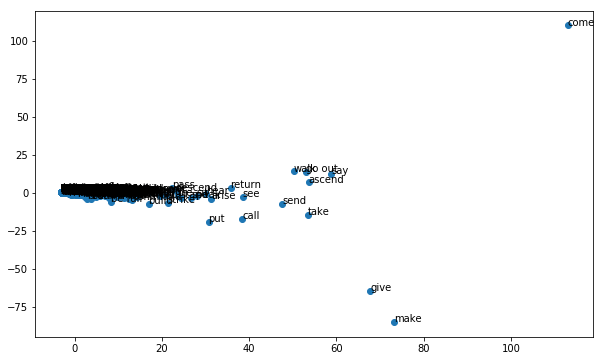

In [8]:
v2_space.pmi_plot.show()

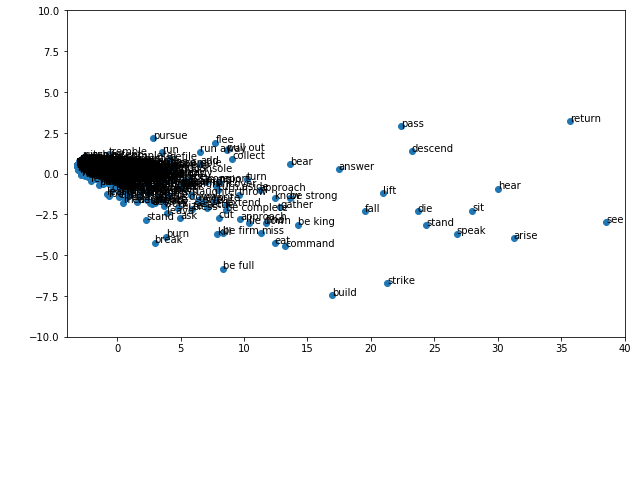

In [9]:
v2_space.pmi_plot.show(axis=[-4, 40, -10, 10]) # zoom

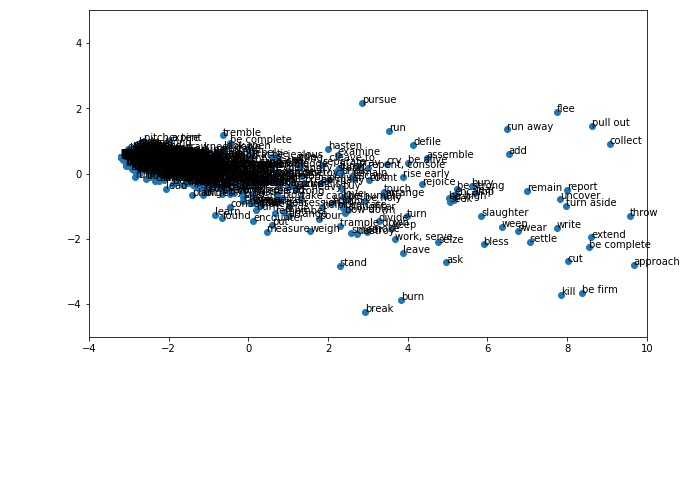

In [10]:
v2_space.pmi_plot.show(axis=[-4, 10, -5, 5]) # zoom

In [12]:
show_top(v2_space.raw, v2_space.similarity_pmi, show=10)

>MR[ (say)         1.000000
R>H[ (see)         0.292203
CM<[ (hear)        0.291840
BW>[ (come)        0.267670
DBR[ (speak)       0.241164
QWM[ (arise)       0.236464
<NH[ (answer)      0.230284
HLK[ (walk)        0.222492
MWT[ (die)         0.213664
NGC[ (approach)    0.204131
Name: >MR[ (say), dtype: float64

BW>[ (come)      1.000000
>MR[ (say)       0.267670
JY>[ (go out)    0.248916
HLK[ (walk)      0.241694
<LH[ (ascend)    0.229015
CWB[ (return)    0.223477
CLX[ (send)      0.191199
JCB[ (sit)       0.189109
R>H[ (see)       0.182479
NF>[ (lift)      0.174800
Name: BW>[ (come), dtype: float64

NTN[ (give)       1.000000
FJM[ (put)        0.236702
LQX[ (take)       0.190222
CLX[ (send)       0.188217
YWH[ (command)    0.172575
<FH[ (make)       0.171944
C>L[ (ask)        0.154857
NF>[ (lift)       0.150627
BW>[ (come)       0.148928
<MD[ (stand)      0.142253
Name: NTN[ (give), dtype: float64

<FH[ (make)        1.000000
NTN[ (give)        0.171944
FJM[ (put)         0.171672
BN

## Verb Experiment 3, Removing subject as a valid basis element

The example of שכב and its supposed similarities with מלך ("to rule") has raised the issue of whether subjects should indeed be considered basis elements. How does the model perform without subjects?

In [35]:
verb_ex3 = VerbNoSubj(tf_api=tf_api)
verb_ex3.data.shape

(5950, 815)

In [36]:
v3_space = SemSpace(verb_ex3, info=500000)

  0.00s Beginning all calculations...
  0.01s beginning Loglikelihood calculations...
   |     8.87s at iteration 500000
   |       18s at iteration 1000000
   |       25s at iteration 1500000
   |       32s at iteration 2000000
   |       40s at iteration 2500000
   |       48s at iteration 3000000
   |       55s at iteration 3500000
   |    1m 01s at iteration 4000000
   |    1m 07s at iteration 4500000
 1m 11s FINISHED loglikelihood at iteration 4849250
 1m 11s beginning PMI calculations...
 1m 48s data gathering complete!


### Space Plots

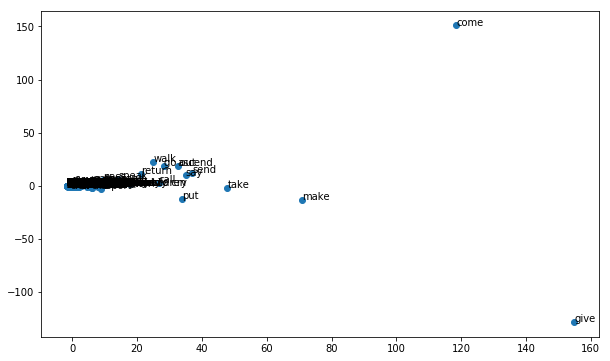

In [38]:
v3_space.pmi_plot.show()

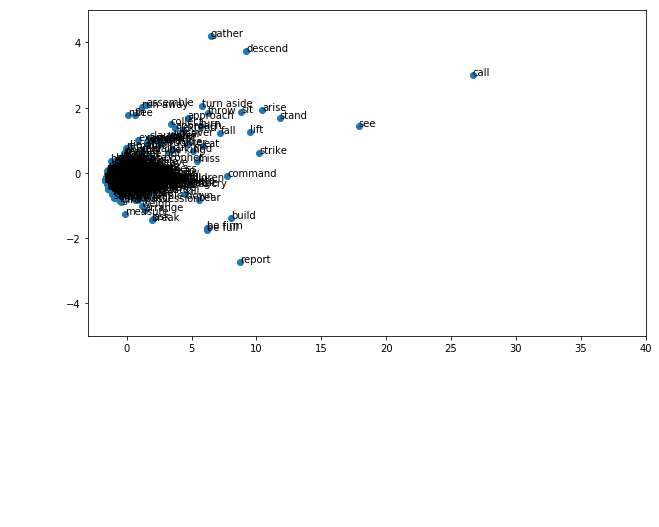

In [39]:
v3_space.pmi_plot.show(axis=[-3, 40, -5, 5])

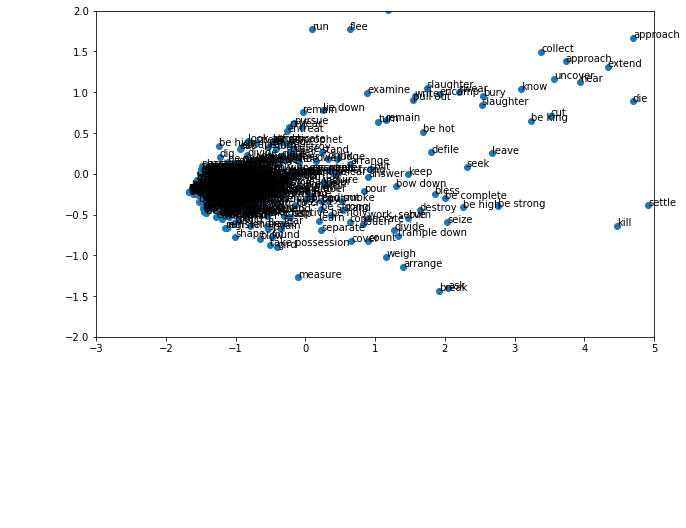

In [40]:
v3_space.pmi_plot.show(axis=[-3, 5, -2, 2])

In [41]:
show_top(v3_space.raw, v3_space.similarity_pmi)

>MR[ (say)         1.000000
NGD[ (report)      0.167648
DBR[ (speak)       0.130527
QR>[ (call)        0.115914
BW>[ (come)        0.085793
CLX[ (send)        0.080635
NTN[ (give)        0.075395
CB<[ (swear)       0.073429
SPR[ (count)       0.072803
NGC[ (approach)    0.064584
Name: >MR[ (say), dtype: float64

BW>[ (come)      1.000000
HLK[ (walk)      0.131030
<LH[ (ascend)    0.127130
JY>[ (go out)    0.123140
CWB[ (return)    0.122113
CLX[ (send)      0.104850
>MR[ (say)       0.085793
>SP[ (gather)    0.084991
NTN[ (give)      0.083744
DBR[ (speak)     0.074379
Name: BW>[ (come), dtype: float64

NTN[ (give)       1.000000
FJM[ (put)        0.146851
LQX[ (take)       0.106662
NGD[ (report)     0.105401
<FH[ (make)       0.097076
KWN[ (be firm)    0.093074
CLX[ (send)       0.086436
BW>[ (come)       0.083744
>MR[ (say)        0.075395
ML>[ (be full)    0.071506
Name: NTN[ (give), dtype: float64

<FH[ (make)           1.000000
NTN[ (give)           0.097076
FJM[ (put)            0.

In [44]:
show_top(v3_space.raw, v3_space.similarity_jaccard)

>MR[ (say)       1.000000
DBR[ (speak)     0.103529
QR>[ (call)      0.097070
NGD[ (report)    0.095506
BW>[ (come)      0.067818
CLX[ (send)      0.062278
NTN[ (give)      0.057176
<LH[ (ascend)    0.041971
<FH[ (make)      0.041223
CWB[ (return)    0.040340
Name: >MR[ (say), dtype: float64

BW>[ (come)      1.000000
<LH[ (ascend)    0.096467
HLK[ (walk)      0.095304
JY>[ (go out)    0.085366
CWB[ (return)    0.085202
CLX[ (send)      0.083225
NTN[ (give)      0.070291
>MR[ (say)       0.067818
LQX[ (take)      0.057937
DBR[ (speak)     0.053812
Name: BW>[ (come), dtype: float64

NTN[ (give)      1.000000
FJM[ (put)       0.106021
LQX[ (take)      0.080499
<FH[ (make)      0.075127
BW>[ (come)      0.070291
CLX[ (send)      0.065934
>MR[ (say)       0.057176
<LH[ (ascend)    0.052174
QR>[ (call)      0.051683
NGD[ (report)    0.048819
Name: NTN[ (give), dtype: float64

<FH[ (make)      1.000000
NTN[ (give)      0.075127
FJM[ (put)       0.069630
<LH[ (ascend)    0.055394
QR>[ (call) 

#### Case Study: קבר and ישב

How is "bury" and "dwell" similar (see above)?

In [46]:
get_common('QBR[', 'JCB[')

{'Pred.Cmpl.B_<JR/',
 'Pred.Cmpl.B_>RY/',
 'Pred.Cmpl.B_BJT/',
 'Pred.Cmpl.B_CKM=/',
 'Pred.Cmpl.B_FDH/',
 'Pred.Cmpl.B_JRWCLM/',
 'Pred.Cmpl.B_M<RH/',
 'Pred.Cmpl.B_TRYH/',
 'Pred.Cmpl.CM',
 'Pred.Loca.<L_PNH/',
 'Pred.Loca.B_<JR/',
 'Pred.Loca.CM',
 'Pred.Objc.>T',
 'Pred.Objc.>T_MLK/',
 'Pred.Subj.<FW/',
 'Pred.Subj.>BRHM/',
 'Pred.Subj.J<QB/',
 'Pred.Subj.JYXQ/'}

Where does a person dwell "with a king"?

In [50]:
king_dwelling = '''

clause
    phrase function=Pred
        word pdp=verb lex=JCB[
    p:phrase function=Objc typ=PP
        w1:word lex=>T
        w2:word lex=MLK/

p -heads> w1
w1 -prep_obj> w2
'''

king_dwelling = sorted(S.search(king_dwelling))

print(len(king_dwelling), 'results...')

B.show(king_dwelling)

1 results...



## Result 0
(**clause** `514302`, **phrase** `900537`, **word** `418193`, **phrase** `900538`, **word** `418194`, **word** `418196`)


Here is an example where the verbal stem has potentially affected the results. Inspired by this example, below I look to see if a space that includes verbal stems would be manageable...

## Verb Experiment 4, Experiment 3 parameters + verbal stem

In [4]:
verb_ex4 = VerbAndStem(tf_api=tf_api)
verb_ex4.data.shape

(5950, 1065)

In [5]:
v4_space = SemSpace(verb_ex4, info=600000)

  0.00s Beginning all calculations...
  0.01s beginning Loglikelihood calculations...
   |       11s at iteration 600000
   |       21s at iteration 1200000
   |       30s at iteration 1800000
   |       38s at iteration 2400000
   |       47s at iteration 3000000
   |       56s at iteration 3600000
   |    1m 05s at iteration 4200000
   |    1m 14s at iteration 4800000
   |    1m 21s at iteration 5400000
   |    1m 27s at iteration 6000000
 1m 31s FINISHED loglikelihood at iteration 6336750
 1m 31s beginning PMI calculations...
 2m 27s FINISHED PMI...
 2m 32s data gathering complete!


In [5]:
v4_space.similarity_pmi.head()

,"<BD[.hif (work, serve)","<BD[.qal (work, serve)",<BR=[.hit (be angry),<BR[.hif (pass),<BR[.piel (pass),<BR[.qal (pass),<DH[.qal (adorn),<DN[.hit (be luxurious),<DR[.nif (be missing),<FH[.nif (make),...,ZNX[.qal (reject),ZR<[.qal (sow),ZRH[.nif (scatter),ZRH[.piel (scatter),ZRH[.qal (scatter),ZRQ[.qal (toss),ZRR[.piel (squeeze),ZRX[.qal (flash up),ZW<[.qal (tremble),ZWR=[.qal (press)
"<BD[.hif (work, serve)",1.000000,0.000000,0.000000,0.038876,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"<BD[.qal (work, serve)",0.000000,1.000000,0.035048,0.005454,0.000000,0.010533,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025793,0.0,0.011308,0.0,0.0,0.0,0.0
<BR=[.hit (be angry),0.000000,0.035048,1.000000,0.000000,0.000000,0.019440,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
<BR[.hif (pass),0.038876,0.005454,0.000000,1.000000,0.037594,0.039984,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019712,0.0,0.008642,0.0,0.0,0.0,0.0
<BR[.piel (pass),0.000000,0.000000,0.000000,0.037594,1.000000,0.027285,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Plots

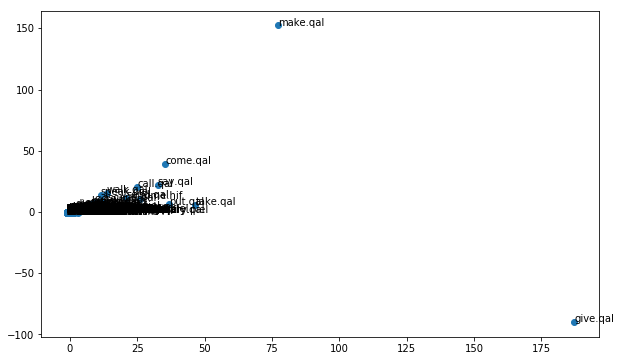

In [6]:
v4_space.pmi_plot.show()

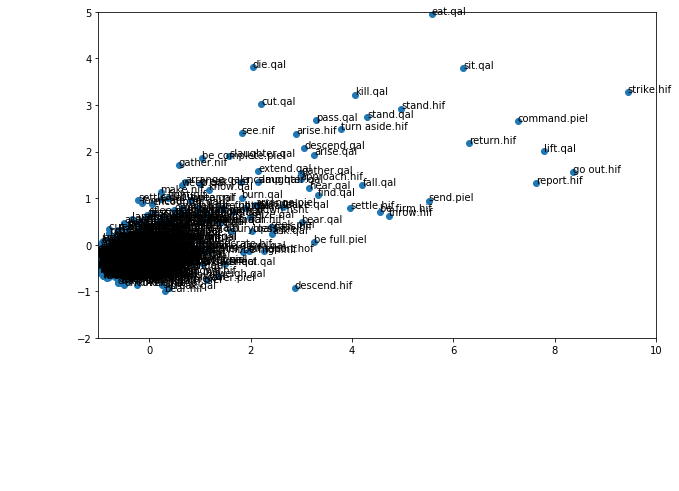

In [7]:
v4_space.pmi_plot.show(axis=[-1, 10, -2, 5]) # zoom

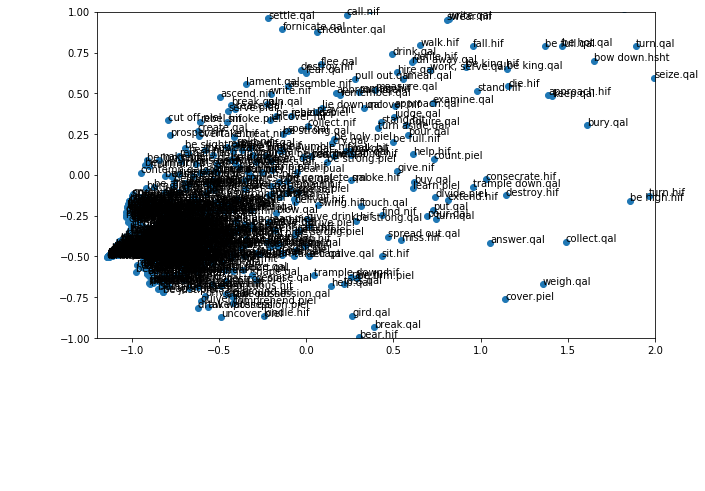

In [11]:
v4_space.pmi_plot.show(axis=[-1.2, 2, -1, 1]) # zoom

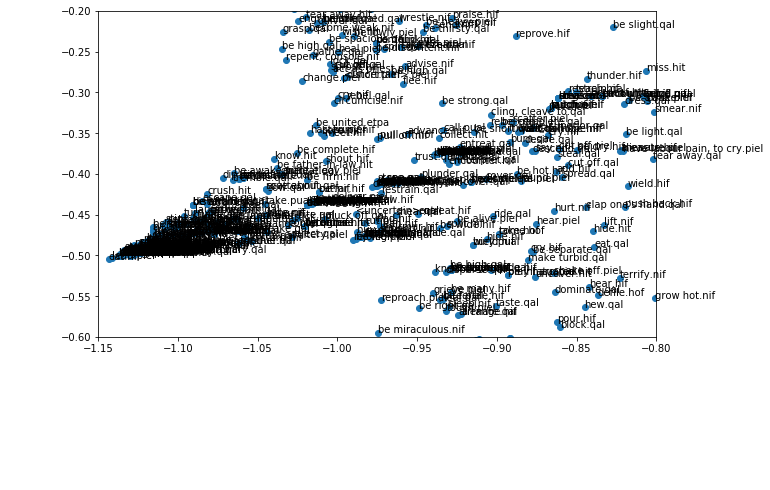

In [26]:
v4_space.pmi_plot.show(axis=[-1.15, -0.8, -0.6, -0.20]) # zoom

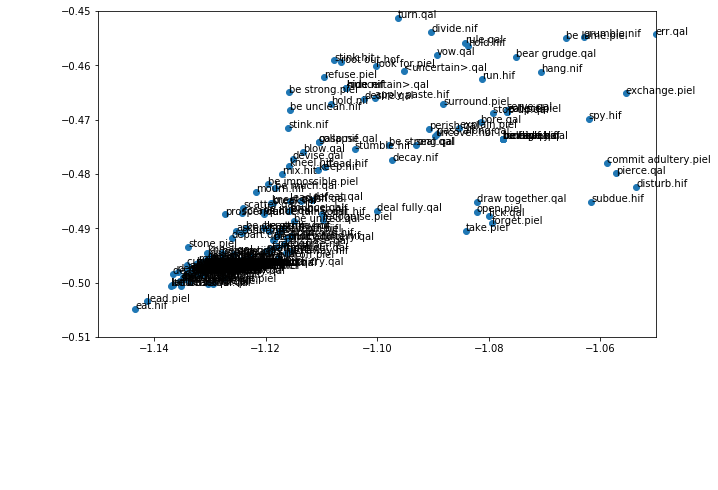

In [27]:
v4_space.pmi_plot.show(axis=[-1.15, -1.05, -0.51, -0.45]) # zoom

In [6]:
lex2target = dict((F.lex.v(v), k) for k, v in verb_ex4.target2lex.items())
target2gloss = verb_ex4.target2gloss

def get_index(token, experiment):
    
    gloss = experiment.target2gloss[token]
    
    return f'{token} ({gloss})'

def show_top(raw_matrix, sim_matrix, show=20): 

    top = raw_matrix.sum().sort_values(ascending=False).head(show)

    for verb in top.index:
        
        key = get_index(verb, verb_ex4)

        print(sim_matrix[key].sort_values(ascending=False).head(10))
        print()

show_top(v4_space.raw, v4_space.similarity_pmi, show=40)

>MR[.qal (say)       1.000000
NGD[.hof (report)    0.145632
NGD[.hif (report)    0.136324
DBR[.piel (speak)    0.130527
QR>[.qal (call)      0.115068
CLX[.qal (send)      0.087403
SPR[.piel (count)    0.086582
JD<[.nif (know)      0.086024
BW>[.qal (come)      0.085781
R>H[.nif (see)       0.077308
Name: >MR[.qal (say), dtype: float64

NTN[.qal (give)       1.000000
FJM[.qal (put)        0.146693
LQX[.qal (take)       0.106457
<FH[.qal (make)       0.097557
BW>[.hif (come)       0.092260
NGD[.hif (report)     0.087880
NGD[.hof (report)     0.086366
>MR[.qal (say)        0.074839
KWN[.hif (be firm)    0.073920
CLX[.qal (send)       0.073534
Name: NTN[.qal (give), dtype: float64

<FH[.qal (make)            1.000000
NTN[.qal (give)            0.097557
FJM[.qal (put)             0.093092
BNH[.qal (build)           0.079327
DBR[.piel (speak)          0.072028
>KL[.qal (eat)             0.068061
KLH[.piel (be complete)    0.067650
HRG[.qal (kill)            0.066298
CBR[.piel (break)        

In [7]:
def show_sims(lex_string, sim_matrix, show=10):
    target = lex2target[lex_string]
    key = f'{target} ({target2gloss[target]})'
    
    print(sim_matrix[key].sort_values(ascending=False).head(show))

In [8]:
show_sims('RWY[', v4_space.similarity_pmi)

RWY[.hif (run)        1.000000
RWM[.hif (be high)    0.107256
<BR[.hif (pass)       0.089804
JY>[.qal (go out)     0.047734
BW>[.hif (come)       0.040745
ZWR=[.qal (press)     0.000000
JCB[.qal (sit)        0.000000
JBC[.hif (be dry)     0.000000
JBC[.qal (be dry)     0.000000
JC<[.hif (help)       0.000000
Name: RWY[.hif (run), dtype: float64


In [14]:
show_sims('MWT[', v4_space.similarity_pmi)

MWT[.hof (die)            1.000000
NPC[.nif (take breath)    0.738647
M<K[.pual (squeeze)       0.738647
GNB[.hit (steal)          0.674093
PRR[.hof (break)          0.674093
CJR[.qal (sing)           0.674093
J<Y[.qal (advise)         0.674093
NGF[.nif (drive)          0.674093
NGP[.nif (hurt)           0.544608
XLH[.qal (become weak)    0.453923
Name: MWT[.hof (die), dtype: float64


In [22]:
get_common('>KL[.qal', 'CPV[.qal', v4_space.raw)

{'Pred.Loca.B_MYPH=/',
 'Pred.Loca.CM',
 'Pred.Objc.>T_JFR>L/',
 'Pred.Time.B_JWM/',
 'Pred.Time.CNH/',
 'Pred.Time.JWM/'}

#### Case Study: How is Israel "Eaten"?

See above that אכל and שפט have in common a use of "Israel" as an object. How can this be the case?

In [25]:
israel_eaten = '''

clause
    phrase function=Pred|PreO|PreS|PtcO
        word pdp=verb lex=>KL[
        
    p1:phrase function=Objc
        w1:word lex=>T
        w2:word lex=JFR>L/

p1 -heads> w1
w1 -prep_obj> w2
'''

israel_eaten = B.search(israel_eaten)

B.show(israel_eaten)


##### Result 0


This is fascinating, metaphorical imagery that has been included since it is written with the wayyiqtol, and hence is labeled as "narrative" in the BHSA. This is a poetic metaphor that has slipped into the data. There are probably many other such examples.

#### Case Study הרג and שכר

Why are these two words similar?

In [21]:
get_common('HRG[.qal', 'FKR[.qal', v4_space.raw)

{'Pred.Cmpl.B',
 'Pred.Objc.>JC/',
 'Pred.Objc.>T_BL<M/',
 'Pred.Objc.MLK/',
 'Pred.Objc.PRC/',
 'Pred.Objc.RKB/'}

The object relation has resulted in these words being rated similarly. These two words have in common the attribute that they both can take people as direct objects, namely, איש, בלעם, מלך, פרשׁ, רֶכֶב, which are all people-nouns that can receive the actions of being "slain" or being "hired." 

There are two other terms within the similarity list of הרג that are closer in meaning: 

> ZNB[.piel (cut off)     0.134066 <br>
> NKH[.hif (strike)       0.113741

Let's see if their common arguments with הרג are different.

In [36]:
get_common('HRG[.qal', 'NKH[.hif', v4_space.raw)

{'PreO.Adju.B_XRB/',
 'Pred.Adju.L_PH/',
 'Pred.Cmpl.B',
 'Pred.Cmpl.B_XRB/',
 'Pred.Loca.B_FDH/',
 'Pred.Objc.<FRJM/',
 'Pred.Objc.>JC/',
 'Pred.Objc.>T',
 'Pred.Objc.>T_<BD/',
 'Pred.Objc.>T_>JC/',
 'Pred.Objc.>T_BN/',
 'Pred.Objc.>T_KN<NJ/',
 'Pred.Objc.>T_MLK/',
 'Pred.Objc.BKR/',
 'Pred.Objc.M>H/',
 'Pred.Objc.XMC/',
 'Pred.Objc.ZKR=/',
 'Pred.Time.B_JWM/'}

In [37]:
get_common('HRG[.qal', 'ZNB[.piel', v4_space.raw)

{'Pred.Cmpl.B', 'Pred.Objc.KL/'}

And:
> KR<[.hif (kneel)        0.136802

In [38]:
get_common('HRG[.qal', 'KR<[.hif', v4_space.raw)

{'Pred.Objc.BXWR/'}

In the case of הרג, the more relevant complement elements such as בחרב "with a sword" are overlooked due to the slightly overpowering objects elements. Yet these elements are perhaps still informative for meaning. It could be helpful to experiment with a no-object experiment and see whether the results are improved or worsened. Movement verbs seem to have much better quality matches. These verbs probably lack objects. Let's test that theory.

> JY>[.qal (go out)    1.000000 <br>
> BW>[.qal (come)      0.137023

In [39]:
get_common('JY>[.qal', 'BW>[.qal', v4_space.raw)

{'Pred.Adju.B_JD/',
 'Pred.Adju.B_RGL/',
 'Pred.Adju.B_XJL/',
 'Pred.Adju.DRK/_C<R/',
 'Pred.Adju.L_<JN/',
 'Pred.Adju.L_MLXMH/',
 'Pred.Adju.L_RB=/',
 'Pred.Cmpl.<D_L',
 'Pred.Cmpl.<L_>RY/',
 'Pred.Cmpl.>HL/',
 'Pred.Cmpl.>L',
 'Pred.Cmpl.>L_<JR/',
 'Pred.Cmpl.>L_>B/',
 'Pred.Cmpl.>L_>BCLWM/',
 'Pred.Cmpl.>L_>X/',
 'Pred.Cmpl.>L_FDH/',
 'Pred.Cmpl.>L_J<QB/',
 'Pred.Cmpl.>L_MDBR/',
 'Pred.Cmpl.>L_PNH/',
 'Pred.Cmpl.>XR/',
 'Pred.Cmpl.B',
 'Pred.Cmpl.B_>RY/',
 'Pred.Cmpl.B_C<R/',
 'Pred.Cmpl.B_TWK/',
 'Pred.Cmpl.FDH/',
 'Pred.Cmpl.JM/',
 'Pred.Cmpl.JRDN/',
 'Pred.Cmpl.LWZ=/',
 'Pred.Cmpl.L_MLXMH/',
 'Pred.Cmpl.L_PNH/',
 'Pred.Cmpl.MDBR/',
 'Pred.Cmpl.MN_<JR/',
 'Pred.Cmpl.MN_<M/',
 'Pred.Cmpl.MN_>XR/',
 'Pred.Cmpl.MN_CMRWN/',
 'Pred.Cmpl.MN_JRWCLM/',
 'Pred.Cmpl.MN_MXNH/',
 'Pred.Cmpl.MN_MYRJM/',
 'Pred.Cmpl.XYR/',
 'Pred.Time.>XR/',
 'Pred.Time.>XR/_KN',
 'Pred.Time.B_<RB/',
 'Pred.Time.B_JWM/',
 'Pred.Time.B_YHRJM/',
 'Pred.Time.LJLH/'}

In this case, we have no objects, and the matched terms are very close in meaning. Thus we see that movement verbs appear to have a higher performance than verbs that accept objects.

#### Cluster Experiments

What happens if we attempt a two-way cluster using k-medoids? Dendrogram?

**Clustering with KMeans & Jaccardian Distance**

Two clusters are produced using K-Means. There is a rather large and small cluster. In this case, cluster 0 is the biggest (1065 verbs) and cluster 1 is smallest (223 verbs). The results show that cluster 1 has a *slight* preference (+10%) for verb lexemes with "be" or "become" within its gloss. A manual inspection shows that many terms appear to have a stative content.

In [40]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(v4_space.pairwise_jaccard, 0))

In [41]:
cluster_mat_glossed = pd.DataFrame(kmeans.labels_, 
                           index=[f'{verb_ex4.target2gloss[w]}.{F.vs.v(verb_ex4.target2node[w])}' for w in v4_space.pmi.columns], 
                           columns=['cluster']).fillna(0)

cluster_mat = pd.DataFrame(kmeans.labels_, 
                           index=v4_space.pmi.columns, 
                           columns=['cluster']).fillna(0)

cluster_mat_glossed.head(5)

,cluster
"work, serve.hif",0
"work, serve.qal",0
be angry.hit,0
pass.hif,0
pass.piel,0


Size of cluster 0

In [42]:
cluster_0 = cluster_mat_glossed[cluster_mat_glossed.cluster == 0]
cluster_1 = cluster_mat_glossed[cluster_mat_glossed.cluster == 1]

cluster_0.shape

(1032, 1)

Size of cluster 1

In [48]:
cluster_1

,cluster
be missing.nif,1
sing.qal,1
be pleasing.qal,1
entreat.nif,1
be mighty.qal,1
dress.qal,1
be long.qal,1
change.qal,1
spread.qal,1
break out.nif,1


**Testing for "be" or "become" amongst the clusters**

In [44]:
clust_1_be = cluster_1[cluster_1.index.str.contains('be|become', regex=True)]

clust_1_be.shape

(7, 1)

Ratio of cluster 1 with "be" or "become" in the gloss:

In [45]:
clust_1_be.shape[0] / cluster_1.shape[0]

0.21212121212121213

In [46]:
clust_0_be = cluster_0[cluster_0.index.str.contains('be|become', regex=True)]

clust_0_be.shape

(178, 1)

Ratio of cluster 2 with "be" or "become" in the gloss:

In [47]:
clust_0_be.shape[0] / cluster_0.shape[0]

0.17248062015503876

**Testing for Prevalence of the "Object" function between the two clusters**

In [185]:
cluster_0 = cluster_mat[cluster_mat.cluster == 0]
cluster_1 = cluster_mat[cluster_mat.cluster == 1]

#clust_0_obj = v4_space.
clust_1_data = v4_space.raw[cluster_1.index]
clust_1_obj = clust_1_data[clust_1_data[clust_1_data.index.str.contains('Objc|O', regex=True)] > 0]

v4_space.raw['<BH[.qal'].sum()

0.0

## Verb Experiment 5

This experiment combines the parameters of experiments 3 and 4 with experiment 2, i.e. lexeme suppression for adjunctive basis elements.